In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpdaf.obj import Image

In [2]:
Bin, vel, disp, chi2, dV, dsigma = np.loadtxt('Output_Ppxf_IndoGK_Template.txt', unpack=True) #Reads the table with the adjustment data/Lê a tabela com os dados do ajuste

vel = vel - vel[0]                                   #vel[0] velocity of central px
vrms = np.sqrt(np.array(vel)**2 + np.array(disp)**2) #Vrms velocity
erms = np.sqrt((np.array(dV)*np.array(vel))**2 + (np.array(dsigma)*np.array(disp))**2)/vrms #error in vrms

In [3]:
dr = 0
rell = np.empty_like(vrms)
for i in range(len(vrms)):
    rell[i] = dr
    dr = dr + 0.2

Text(0.5, 0, 'Circularized radius')

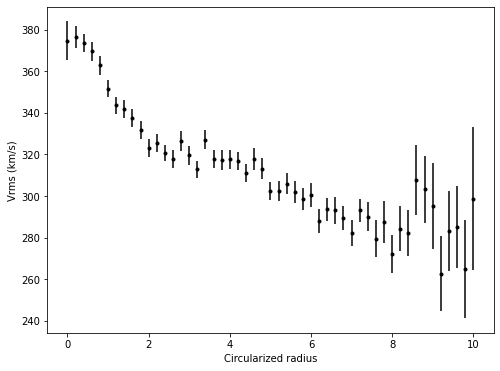

In [4]:
plt.figure(figsize=(8,6))
plt.errorbar(rell,vrms, yerr=erms, fmt=".k", capsize=0)
plt.ylabel("Vrms (km/s)")
plt.xlabel("Circularized radius")

## Frist Map with Voronoi Bin

In [5]:
# To compute the elliptical radius we need that x-axis coincident with the galaxy major axis.
# So we need to rotate the pixel position
def rotate_points(x, y, ang):
    """
    Rotates points conter-clockwise by an angle ANG in degrees.
    Michele cappellari, Paranal, 10 November 2013

    """
    theta = np.radians(ang)
    xNew = x*np.cos(theta) - y*np.sin(theta)
    yNew = x*np.sin(theta) + y*np.cos(theta)

    return xNew, yNew  

In [6]:
rell_vor = [] #elliptical radii

vrms_vor = [] #list for Vrms
erms_vor = [] #list for error rms

#Galaxy structural parameters
x0, y0 = (9, 9)
pa     = 68.0
eps    = 0.221
scale  = 0.6

In [7]:
vrms_vorbin = Image("/home/carlos/Desktop/ESO/Data/Velocity Dispersion Map Second Run_vorbin.fits")

In [8]:
for i in range(vrms_vorbin.data.data.shape[0]):       #y pixel
    for j in range(vrms_vorbin.data.data.shape[1]):   #x pixel
        rot_x, rot_y = rotate_points(j - x0, i - y0, 90 - pa)
        r = scale * np.sqrt(rot_x**2 + (rot_y/(1-eps))**2)
        rell_vor.append(r)
        vrms_vor.append(vrms_vorbin.data.data[i,j])
        erms_vor.append(vrms_vorbin.var.data[i,j])

Text(0.5, 0, 'Circularized radius')

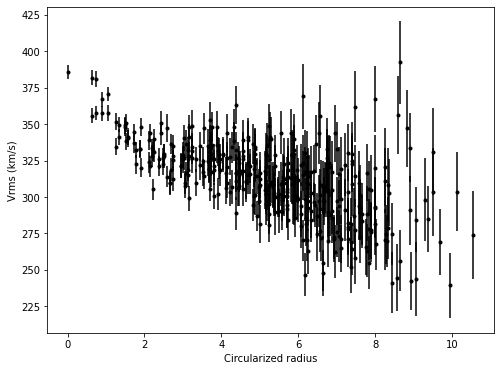

In [9]:
plt.figure(figsize=(8,6))
plt.errorbar(rell_vor,vrms_vor, yerr=erms_vor, fmt=".k", capsize=0)
plt.ylabel("Vrms (km/s)")
plt.xlabel("Circularized radius")

## Both

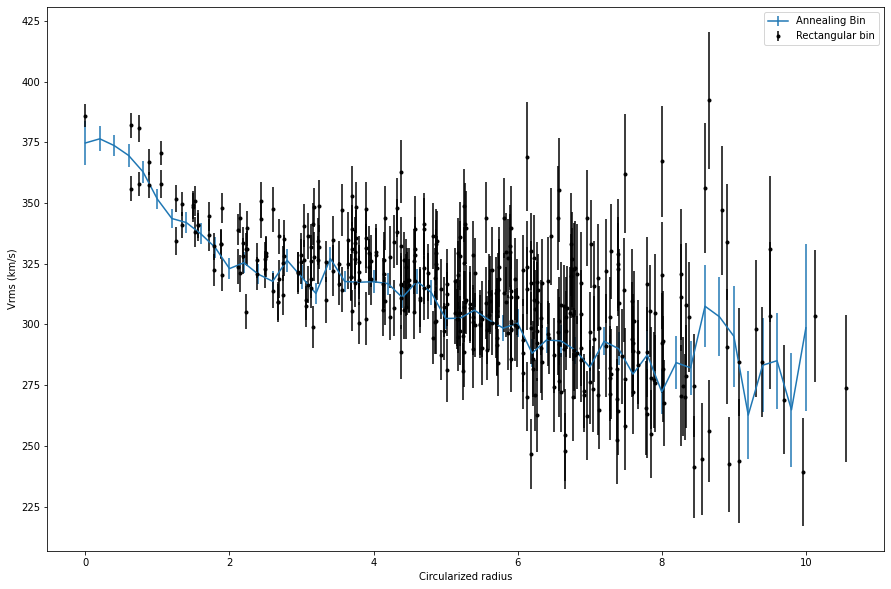

In [15]:
plt.figure(figsize=(15,10))
plt.errorbar(rell,vrms, yerr=erms, capsize=0, label="Annealing Bin")
plt.errorbar(rell_vor,vrms_vor, yerr=erms_vor, fmt=".k", capsize=0, label="Rectangular bin")
plt.ylabel("Vrms (km/s)")
plt.xlabel("Circularized radius")

plt.legend()

In [17]:
erms

array([ 9.18352793,  5.12510322,  4.39312071,  4.60339092,  4.62922399,
        4.17337705,  4.06202991,  4.39497135,  4.41898547,  4.26113373,
        4.43857813,  4.21657506,  4.00715708,  4.30174099,  4.66525029,
        4.74464251,  4.30871634,  4.62875762,  4.38688636,  4.65840456,
        4.73104867,  4.49854402,  4.34449032,  5.13993242,  5.05000818,
        4.47744198,  4.86511718,  4.98421963,  5.14888241,  5.24453977,
        5.7037393 ,  5.85155156,  5.55648302,  6.52909648,  5.59341138,
        6.17753534,  5.7109485 ,  6.93297538,  8.89233457, 10.07656785,
        9.09648907, 10.77946478, 11.14881886, 16.81470378, 16.16935514,
       20.7645121 , 18.16491232, 19.45791368, 19.75656861, 23.47509375,
       34.40123949])